In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.cluster import KMeans

In [35]:
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [0]:
#!pip install tensorflow==1.15

In [2]:
!apt install unzip

No Java runtime present, requesting install.


In [3]:
!unzip "/content/flights.pkl.zip"

unzip:  cannot find or open /content/flights.pkl.zip, /content/flights.pkl.zip.zip or /content/flights.pkl.zip.ZIP.


In [7]:
df = pd.read_pickle('flights.pkl')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673761 entries, 0 to 2673760
Data columns (total 67 columns):
YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                  object
OP_UNIQUE_CARRIER        object
OP_CARRIER_AIRLINE_ID    int64
OP_CARRIER               object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_NM          object
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_NM            object
CRS_DEP_TIME             int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
DE

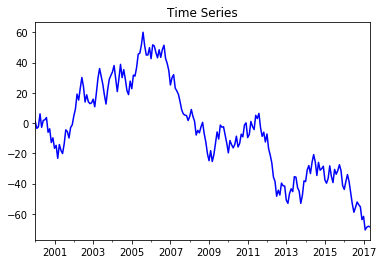

2000-01-31    1.071525
2000-02-29   -3.530951
2000-03-31   -2.425517
2000-04-30    6.072342
2000-05-31   -2.792232
2000-06-30    1.767212
2000-07-31    2.157021
2000-08-31    3.657286
2000-09-30   -6.105115
2000-10-31   -3.787104
Freq: M, dtype: float64

In [0]:
random.seed(111)
rng = pd.date_range(start='2000', periods=209, freq='M')
df = pd.Series(np.random.uniform(-10, 10, size=len(rng)), rng).cumsum()
df.plot(c='b', title='Time Series')
plt.show()
df.head(10)

In [9]:
df.groupby('DEP_DELAY').size()

DEP_DELAY
-47.0          1
-35.0          1
-34.0          2
-31.0          2
-30.0          2
-29.0          1
-28.0          2
-27.0          6
-26.0          3
-25.0          5
-24.0         13
-23.0         17
-22.0         21
-21.0         35
-20.0         75
-19.0        117
-18.0        162
-17.0        236
-16.0        400
-15.0        669
-14.0        999
-13.0       1643
-12.0       2393
-11.0       3740
-10.0       7202
-9.0        9227
-8.0       13055
-7.0       18199
-6.0       23903
-5.0       30720
           ...  
 1682.0        1
 1690.0        1
 1718.0        1
 1723.0        1
 1741.0        1
 1742.0        1
 1751.0        1
 1752.0        1
 1753.0        1
 1787.0        1
 1789.0        1
 1790.0        1
 1792.0        1
 1822.0        2
 1839.0        1
 1855.0        1
 1861.0        1
 1959.0        1
 2007.0        1
 2058.0        1
 2064.0        1
 2079.0        1
 2098.0        8
 2109.0        1
 2209.0        1
 2315.0        1
 2468.0        1
 248

In [10]:
df = df.loc[~df.CANCELLED.isin([1])]

In [11]:
df['OUTPUT_LABEL'] = (df.DEP_DELAY >=0).astype('int')

In [12]:
def clac_prevalence(y_actual):
  return (sum(y_actual)/len(y_actual))

In [13]:
print ('prevalence:%.3f'%clac_prevalence(df['OUTPUT_LABEL'].values))

prevalence:0.895


In [14]:
cols_num = ['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'CRS_ARR_TIME', 'DAY_OF_WEEK']
cols_num

['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'CRS_ARR_TIME', 'DAY_OF_WEEK']

In [15]:
df[cols_num].isnull().sum()

CRS_DEP_TIME    0
DEP_TIME        0
DISTANCE        0
CRS_ARR_TIME    0
DAY_OF_WEEK     0
dtype: int64

In [16]:
cols_cat = ['OP_CARRIER', 'ORIGIN', 'DEST']
cols_cat

['OP_CARRIER', 'ORIGIN', 'DEST']

In [17]:
df[cols_cat].isnull().sum()

OP_CARRIER    0
ORIGIN        0
DEST          0
dtype: int64

In [18]:
df[cols_cat].nunique()

OP_CARRIER     18
ORIGIN        362
DEST          362
dtype: int64

In [19]:
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)
df_cat.head()

,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_G4,OP_CARRIER_HA,OP_CARRIER_MQ,OP_CARRIER_NK,...,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_YAK,DEST_YNG,DEST_YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df = pd.concat([df,df_cat], axis = 1)

In [21]:
cols_all_cat = list(df_cat.columns)
print('number of catergorical:',len(cols_all_cat))

number of catergorical: 739


In [22]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]
df_data.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,CRS_ARR_TIME,DAY_OF_WEEK,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,...,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_YAK,DEST_YNG,DEST_YUM,OUTPUT_LABEL
0,1555,1610.0,759.0,1850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,650,743.0,759.0,950,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1540,1658.0,759.0,1840,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1540,1628.0,759.0,1840,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1540,1638.0,759.0,1840,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df_data = df_data.sample(n = len(df_data))
df_data = df_data.reset_index(drop = True)

In [24]:
df_valid_test=df_data.sample(frac=0.30, replace=True)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [25]:
df_test = df_valid_test.sample(frac=0.5, replace=True)
df_valid = df_valid_test.drop(df_test.index)

In [26]:
df_train_all=df_data.drop(df_valid_test.index) 

In [27]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),clac_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),clac_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all),clac_prevalence(df_test.OUTPUT_LABEL.values)))

Test prevalence(n = 365505):0.896
Valid prevalence(n = 393768):0.895
Train all prevalence(n = 1805436):0.896


In [28]:
print('all samples (n = %d)'%len(df_data))

all samples (n = 2436701)


In [29]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

In [30]:
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), replace = True, axis = 0)])

In [31]:
df_train = df_train.sample(n = len(df_train)).reset_index(drop = True)

In [32]:
print('Train balanced prevalence(n = %d):%.3f'%(len(df_train),clac_prevalence(df_train.OUTPUT_LABEL.values))) 

Train balanced prevalence(n = 3230386):0.500


In [0]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [35]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [36]:
def fill_my_missing(df, df_mean, col2use):

    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
     
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [33]:
# create the X and y matrices
X_train = df_train[cols_input].values

In [34]:
X_train_all = df_train_all[cols_input].values

In [35]:
X_valid = df_valid[cols_input].values

In [36]:
y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

In [37]:
print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (1805436, 744)
Training shapes: (3230386, 744) (3230386,)
Validation shapes: (393768, 744) (393768,)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [44]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [39]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [40]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual,y_pred, thresh):

    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):

  auc = roc_auc_score(y_actual, y_pred)
  accuracy = accuracy_score(y_actual, (y_pred > thresh))
  recall = recall_score(y_actual,(y_pred > thresh))
  precision = precision_score(y_actual,(y_pred > thresh))
  specificity = calc_specificity(y_actual, (y_pred, thresh))
  print('AUC:%.3f'%auc)
  print('accuracy:%.3f'%accuracy)
  print('recall:%.3f'%recall)
  print('precision:%.3f'%precision)
  print('specifcity:%.3f'%specifcity)
  print('prevalence:%.3f'%specifcity)
  print('prevalence:%.3f'%specifcity(y_actual))
  print('')
  return auc, accuracy, recall, precision, specifcity

In [41]:
thresh = 0.5

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression() 

In [ ]:
lr.fit(X_train_tf, y_train)

In [ ]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

In [ ]:
print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss = 'log',alpha = 0.1)
SGDC.fit(X_train_tf, y_train)

y_train_preds = SGDC.predict_proba(X_train_tf)[:,1]
y_valid_preds = SGDC.predict_proba(X_valid_tf)[:,1]

print('SGDC')
print('Training:')
SGDC_train_auc, SGDC_train_accuracy, SGDC_train_recall, \
    SGDC_train_precision, SGDC_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
SGDC_valid_auc, SGDC_valid_accuracy, SGDC_valid_recall, \
    SGDC_valid_precision, SGDC_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, \
nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, \
nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 69)
tree.fit(X_train_tf, y_train)

In [ ]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, \
tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, \
tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, \
rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, \
rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gbc.fit(X_train_tf, y_train)

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, \
gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, \
gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)                   

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, etc_train_precision, \
etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, etc_valid_precision, \
etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()
xgbc.fit(X_train_tf, y_train)

y_train_preds = xgbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, \
xgbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, \
xgbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGBC','XGBC','ETC','ETC'],
                           'data_set':['train','valid']*9,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,xgbc_train_auc,xgbc_valid_auc,etc_train_auc,etc_valid_auc],
                           'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,xgbc_train_recall,xgbc_valid_recall,etc_train_recall,etc_valid_recall],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,xgbc_train_precision,xgbc_valid_precision,etc_train_precision,etc_valid_precision],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity,etc_train_specificity,etc_valid_specificity]})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
Out[96]:
<matplotlib.legend.Legend at 0x1a30eed4a8>

In [ ]:
import time

my_params =  np.arange(0.05, 1.01, 0.05) 

train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    model = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=my_param, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
    model.fit(X_train_tf, y_train)
    
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    metric_train = roc_auc_score(y_train, y_train_preds) 
    metric_valid = roc_auc_score(y_valid, y_valid_preds) 

    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('Max Features') 
plt.ylabel('AUC')
plt.title('Effect of # of Max Features on AUC') 
plt.legend()
plt.show()